# orbit-generation

> A library to handle and generate orbit data

## Orbit Dataset Structure

The orbit dataset is organized within a three-dimensional numpy array with the following structure:


<center><font size="5">data.shape = (num_orbits, 6, num_time_points)</font></center>



### Dimensions Detailed

- **`num_orbits`**: Total number of distinct orbits in the dataset.
- **`6`**: Represents the six scalar values for each orbit at each time point, typically including:
  - **`posX`**, **`posY`**, **`posZ`**: Position components in the X, Y, and Z dimensions, respectively.
  - **`velX`**, **`velY`**, **`velZ`**: Velocity components in the X, Y, and Z dimensions, respectively.
- **`num_time_points`**: Number of time instants at which the data for each orbit is recorded.

### Mathematical Representation

For an individual orbit $i$, the data is represented as a matrix $O_i$ of dimensions $6 \times T$, where $T$ represents the total number of time points ($num\_time\_points$):

The orbit matrix $O_i$ for each orbit $i$ can be represented as:

$$
O_i = \left(\begin{array}{cccc}
posX_{1} & posX_{2} & \ldots & posX_{T} \\
posY_{1} & posY_{2} & \ldots & posY_{T} \\
posZ_{1} & posZ_{2} & \ldots & posZ_{T} \\
velX_{1} & velX_{2} & \ldots & velX_{T} \\
velY_{1} & velY_{2} & \ldots & velY_{T} \\
velZ_{1} & velZ_{2} & \ldots & velZ_{T} \\
\end{array}\right)
$$

And the state vector $vec{v}_{i,t}$ for orbit $i$ at time point $t$ is:


$$
\vec{v}_{i,t} = \left(\begin{array}{c}
posX_t \\
posY_t \\
posZ_t \\
velX_t \\
velY_t \\
velZ_t \\
\end{array}\right)
$$

Thus, the dataset can be envisioned as an assembly of matrices, each encapsulating the trajectory and dynamical state of an orbit over time.

### Accessing the Data

- To retrieve the complete data for a specific orbit $i$, use `data[i, :, :]`.
- For all data points of a specific scalar measurement $j$ across all orbits and time points, use `data[:, j, :]`.
- To access data for a specific scalar measurement $j$ at a given time point $t$ across all orbits, the syntax is `data[:, j, t]`.

This structured approach facilitates efficient data storage and retrieval, allowing for comprehensive and detailed analyses of the orbits.



## Install

```sh
pip install orbit_generation_testing
```

## How to use

In [ ]:
from orbit_generation.data import get_example_orbit_data
from orbit_generation.processing import resample_3d_array
from orbit_generation.stats import plot_histograms_position
from orbit_generation.visualize import visualize_static_orbits, export_dynamic_orbits_html
from orbit_generation.constants import EM_POINTS

### Data

In [ ]:
orbit_data = get_example_orbit_data()
orbit_data.shape

(200, 6, 300)

- Number of orbits: 200
- Time instants: 300

### Processing

In [ ]:
resampled_orbit_data = resample_3d_array(data=orbit_data, axis=2, target_size= 100)
resampled_orbit_data.shape

(200, 6, 100)

- Initial time instants: 300
- Time instants after Resampling: 100

### Statistics

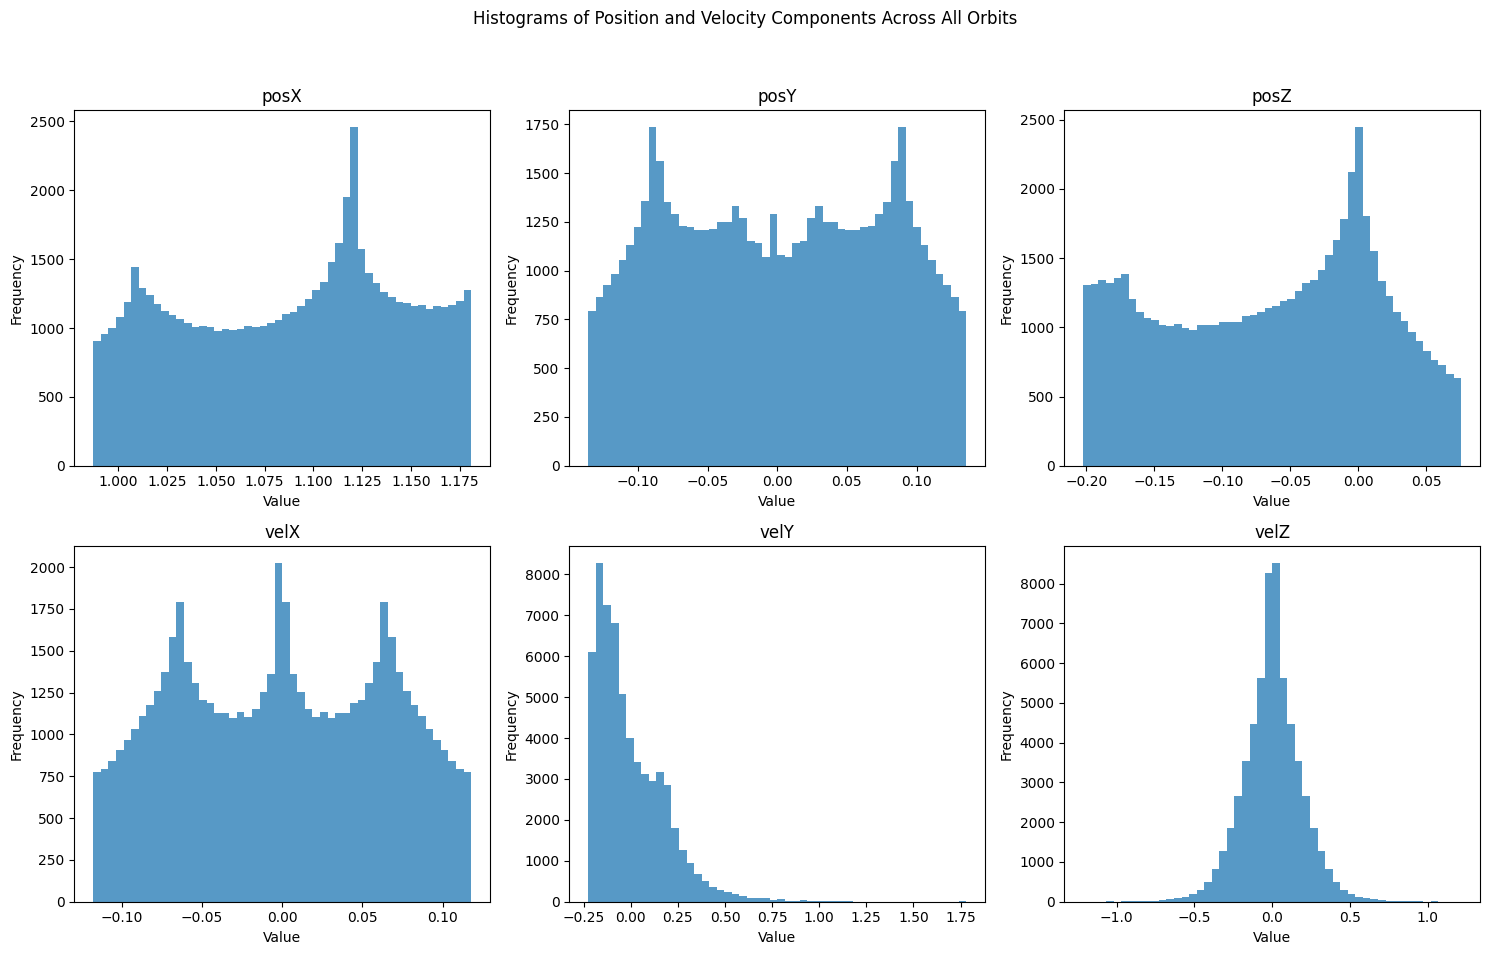

In [ ]:
plot_histograms_position(orbit_data)

### Visualization

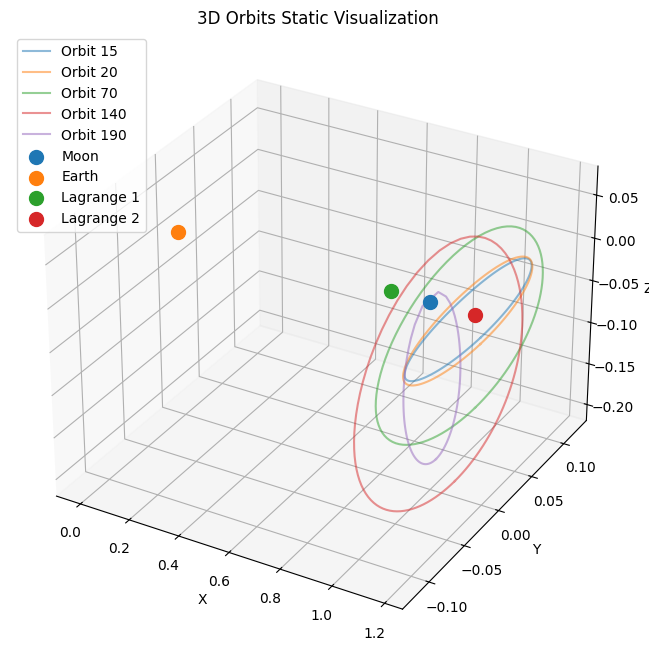

In [ ]:
visualize_static_orbits(resampled_orbit_data, orbit_indices=[15,20,70,140,190], point_dict=EM_POINTS)

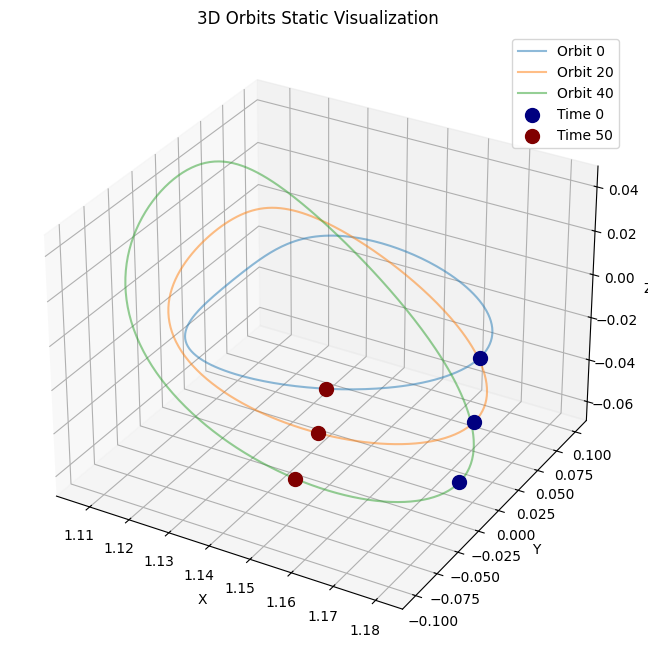

In [ ]:
visualize_static_orbits(data= orbit_data,time_instants=[0,50], orbit_indices=[0,20,40])

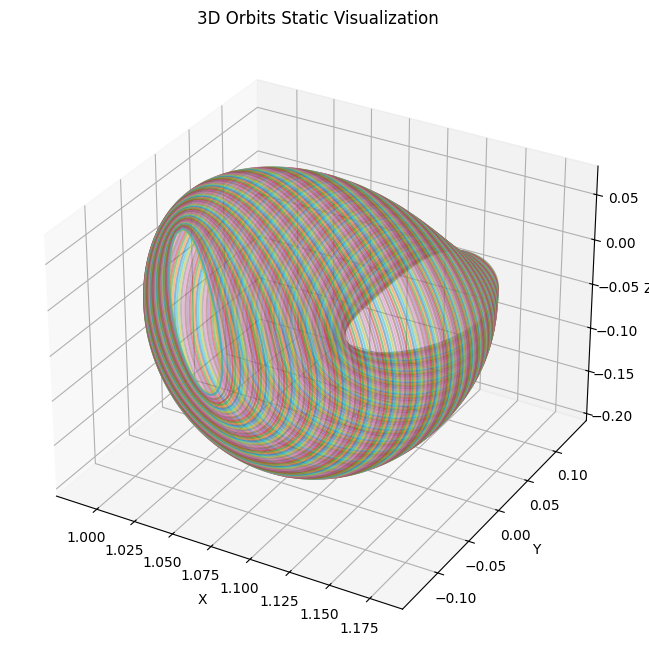

In [ ]:
visualize_static_orbits(orbit_data, show_legend=False)

In [ ]:
export_dynamic_orbits_html(data=orbit_data, filename='../data/example_orbits.html')

Visualization saved to ../data/example_orbits.html
